In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False

df1 = pd.read_table("ReportCard1.txt")
df2 = pd.read_table("ReportCard2.txt")
df = pd.merge(df1, df2, on='id')

# 用 0 填充缺考成绩为 NaN 的情况
df = df.fillna(0)

# 计算每个同学所有课程的总成绩和平均成绩
df['总成绩'] = df.iloc[:, 2:9].sum(axis=1)
df['平均成绩'] = df.iloc[:, 2:9].mean(axis=1)

# 将数据按总成绩的降序排序
df = df.sort_values(by='总成绩', ascending=False)

# 按性别分别计算各门课程的平均成绩
avg_score_by_gender = df.groupby('sex').mean()

# 分组计算平均成绩的优、良、中、及格和不及格
bins = [0, 59, 69, 79, 89, 100]
labels = ['不及格', '及格', '中', '良', '优']
df['成绩等级'] = pd.cut(df['平均成绩'], bins=bins, labels=labels)
grade_counts = df['成绩等级'].value_counts()

print(df)

       id  sex  politics  chinese  math  biology  physics  chemistry  \
59  92101  2.0      96.0     96.0  87.5     72.0     93.0       65.0   
22  92202  1.0      78.0     89.0  83.5     81.0     91.0       77.0   
58  92102  1.0      94.0     97.0  86.5     61.0     93.0       64.0   
51  92104  2.0      89.0     97.0  69.5     86.0     83.0       62.0   
48  92106  2.0      88.0     88.0  78.0     60.0     90.0       70.0   
57  92110  1.0      92.0     94.0  71.0     65.0     78.0       62.0   
14  92203  2.0      74.0     93.0  84.5     50.0     89.0       72.0   
47  92204  2.0      88.0     81.0  87.5     60.0     84.0       63.0   
26  92205  2.0      81.0     79.0  84.0     60.0     91.0       64.0   
31  92207  2.0      83.0     91.0  70.5     60.0     84.0       64.0   
29  92105  1.0      82.0     85.0  79.5     60.0     88.0       66.0   
38  92108  2.0      84.0     90.0  69.5     50.0     80.0       60.0   
27  92112  2.0      81.0     75.5  76.5     43.0     78.0       

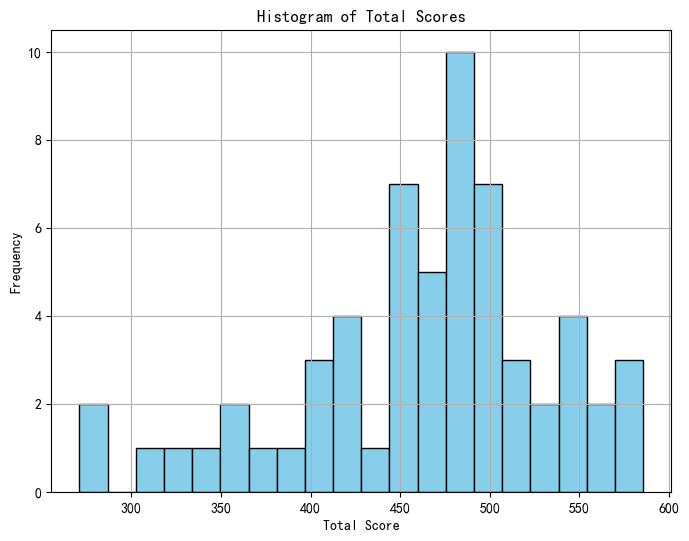

In [23]:
# 绘制总成绩的直方图
plt.figure(figsize=(8, 6))
plt.hist(df['总成绩'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

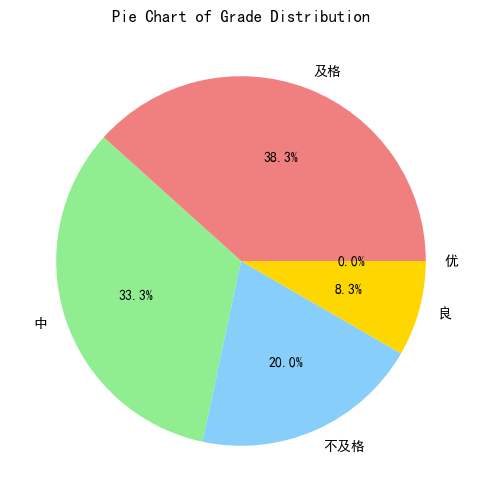

In [24]:
# 绘制平均成绩的优、良、中、及格和不及格的饼图
plt.figure(figsize=(8, 6))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue', 'gold', 'lightgrey'])
plt.title('Pie Chart of Grade Distribution')
plt.show()

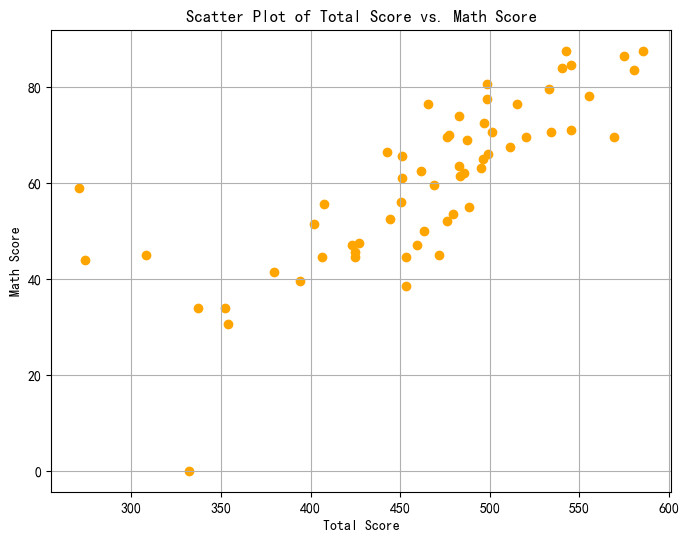

In [25]:
# 提取数学（math）成绩，绘制总成绩和数学成绩的散点图
plt.figure(figsize=(8, 6))
plt.scatter(df['总成绩'], df['math'], color='orange')
plt.title('Scatter Plot of Total Score vs. Math Score')
plt.xlabel('Total Score')
plt.ylabel('Math Score')
plt.grid(True)
plt.show()